# Explainable AI (XAI) - SHAPASH

Shapash is a Python library which aims to make machine learning interpretable and understandable to everyone. Shapash provides several types of visualization which displays explicit labels that everyone can understand.

Data Scientists can more easily understand their models and share their results. End users can understand the decision proposed by a model using a summary of the most influential criteria.


- GitHub : https://github.com/MAIF/shapash

- Documentation : https://shapash.readthedocs.io/

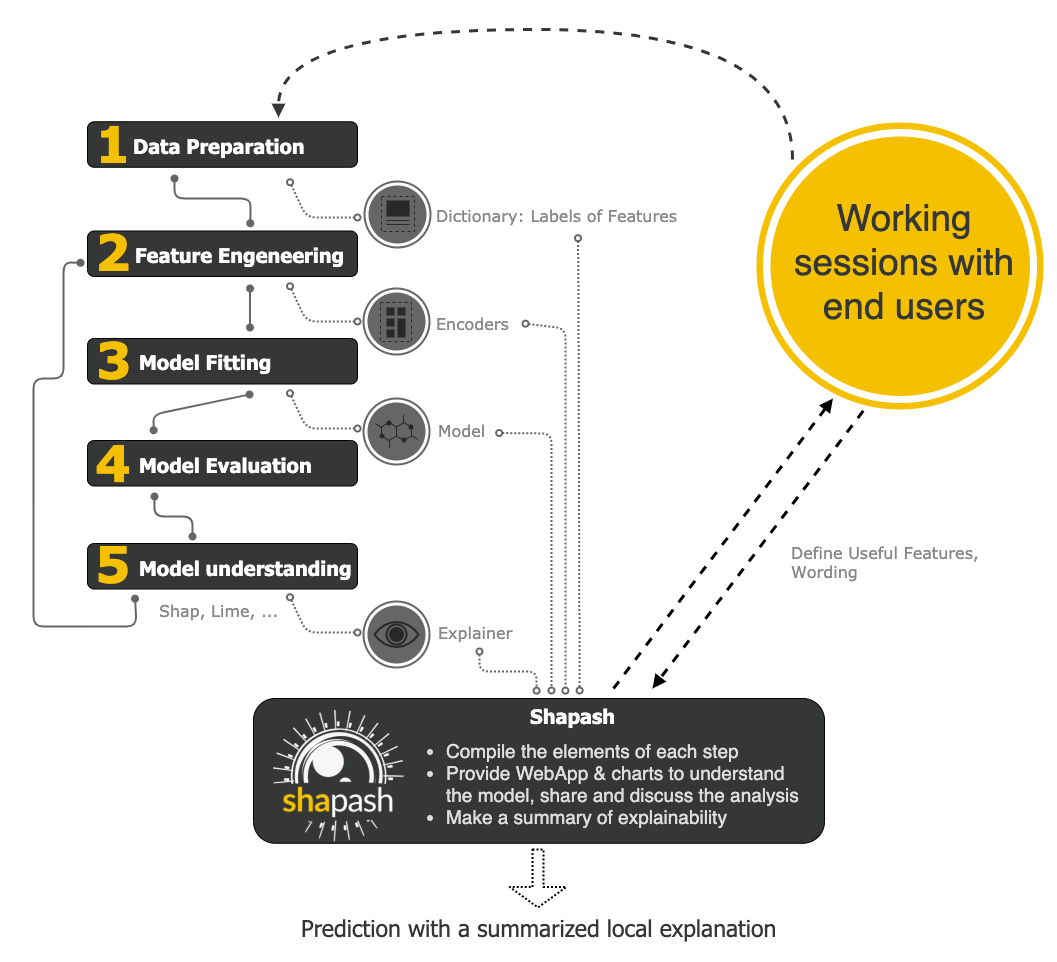

# Importing Libraries

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
import matplotlib.lines as mlines

import warnings
warnings.filterwarnings("ignore")

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline


# Loading Dataset

In [2]:
# Uploading saved dataframe csv file from google drive
! gdown --id 1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX
From (redirected): https://drive.google.com/uc?id=1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX&confirm=t&uuid=e8386116-9048-4223-945d-5d2e17d044b7
To: /content/df_1.csv
100% 788M/788M [00:12<00:00, 65.3MB/s]


In [3]:
%%time
# Load Data
df   = pd.read_csv('/content/df_1.csv')

CPU times: user 23.9 s, sys: 9.27 s, total: 33.2 s
Wall time: 38.7 s


In [4]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V

In [5]:
# Reduce the number of rows
df = df.sample(frac=0.3, random_state=42)

# Check the shape of the reduced DataFrame
df.shape

(177162, 534)

# Model Building

In [6]:
# Split the y variable series and X variables dataset
X = df.drop(['isFraud'],axis=1)
y = df.isFraud.astype(bool)

In [7]:
# Split the dataset into the training set and test set
from   sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [8]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(124013, 533) (124013,)
(53149, 533) (53149,)


In [9]:
# Head of X_train
X_train.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

Handling Missing Values - Imputation

In [10]:
from sklearn.impute import KNNImputer, SimpleImputer

# replace inf
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = KNNImputer(n_neighbors=3)

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import classification_report
from sklearn.metrics  import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics  import roc_auc_score
# from sklearn.metrics  import plot_roc_curve
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics  import plot_precision_recall_curve

In [16]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print('\n')
    print("Accuracy Score: ", accuracy_score(y_actual, y_predicted))
    print("\nAUC - ROC Score: ", roc_auc_score(y_actual, y_predicted_prob))
    print("\nClassification Report: \n\n", classification_report(y_actual, y_predicted))
    print("\nConfusion Matrix: \n\n", confusion_matrix(y_actual, y_predicted))

    # Confusion Matrix Plot
    print("\nConfusion Matrix Plot:")
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_actual, cmap='plasma', values_format='d')
    plt.show()

    # AUC - ROC Curve
    print("\nAUC - ROC Curve:")
    RocCurveDisplay.from_estimator(model, x_test, y_actual)
    plt.show()

    # Precision - Recall Curve
    print("\nPrecision - Recall Curve:")
    PrecisionRecallDisplay.from_estimator(model, x_test, y_actual)
    plt.show()


## Model Fitting

In [19]:
%%time
# Define the model
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(random_state=42, max_depth=20, n_estimators=100, num_leaves=256)

# Train the model
lgbc.fit(X_train_imputed,y_train)

lgbc

[LightGBM] [Info] Number of positive: 4386, number of negative: 119627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.419055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19167
[LightGBM] [Info] Number of data points in the train set: 124013, number of used features: 501
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035367 -> initscore=-3.305961
[LightGBM] [Info] Start training from score -3.305961
CPU times: user 22.5 s, sys: 184 ms, total: 22.7 s
Wall time: 23.1 s


LGBMClassifier(max_depth=20, num_leaves=256, random_state=42)

In [18]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

# Prediction
y_pred_lgbc = lgbc.predict(X_test_imputed)
y_prob_pred_lgbc = lgbc.predict_proba(X_test_imputed)
y_prob_pred_lgbc = [x[1] for x in y_prob_pred_lgbc]
print("Y predicted : ",y_pred_lgbc)
print("Y probability predicted : ",y_prob_pred_lgbc[:5])

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.0024768014074784527, 0.003520348835805541, 0.0011615558962248854, 0.003266946537126845, 0.0005196884423379668]


## Model Evaluation



Accuracy Score:  0.9783062710493142

AUC - ROC Score:  0.9323734988525169

Classification Report: 

               precision    recall  f1-score   support

       False       0.98      1.00      0.99     51194
        True       0.91      0.45      0.61      1955

    accuracy                           0.98     53149
   macro avg       0.95      0.73      0.80     53149
weighted avg       0.98      0.98      0.97     53149


Confusion Matrix: 

 [[51109    85]
 [ 1068   887]]

Confusion Matrix Plot:


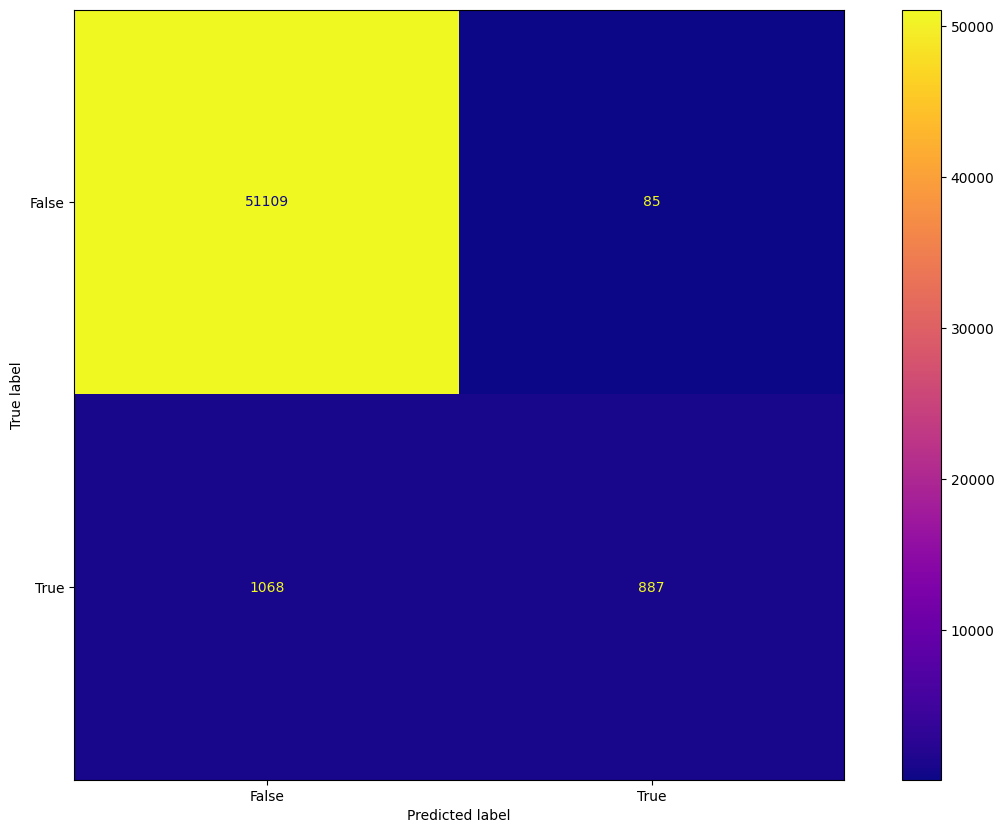


AUC - ROC Curve:


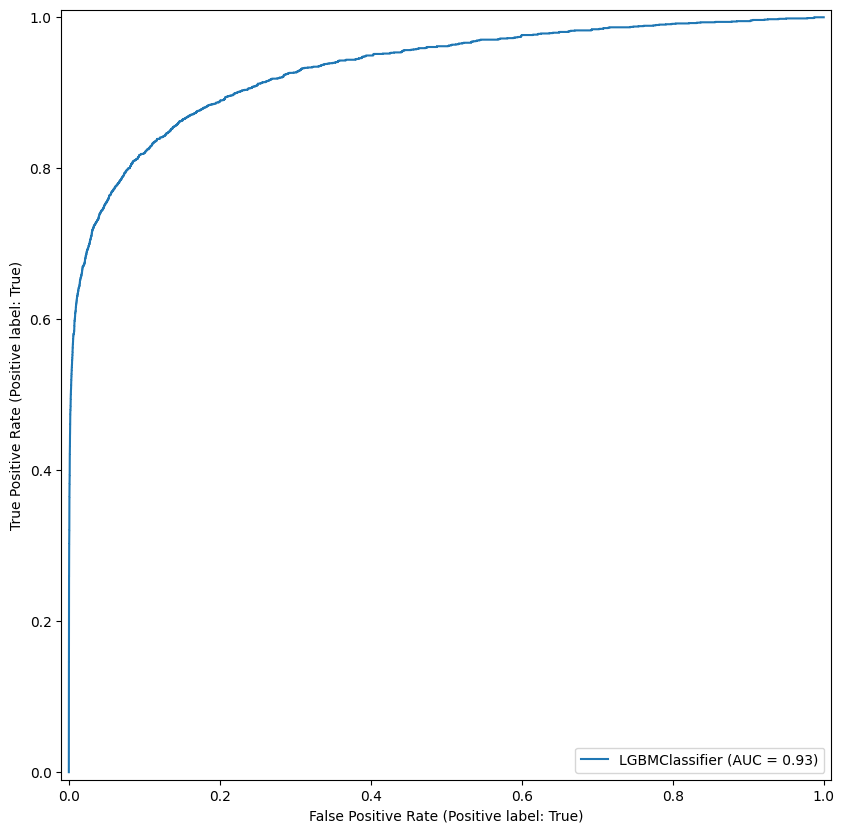


Precision - Recall Curve:


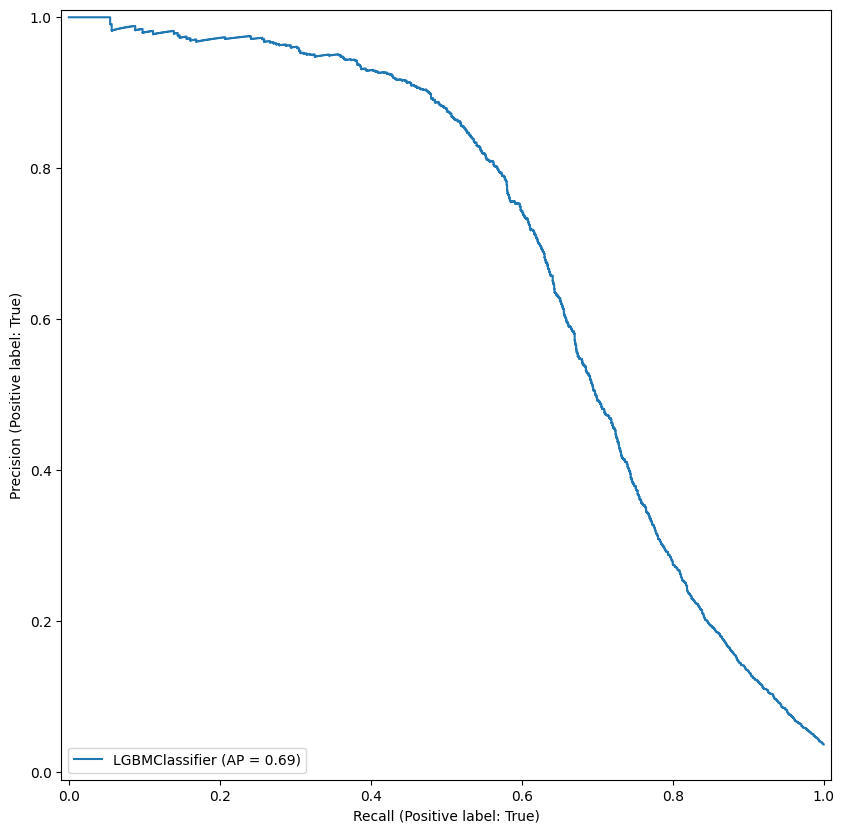

In [20]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbc, X_test_imputed, y_test, y_pred_lgbc, y_prob_pred_lgbc)

## Feature Selection

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [21]:
lgbc.feature_importances_

array([ 343,   63, 1204,  905,  113,  104,  391,  140,  777,   16,  411,
        386,  164,  307,  243,   10,   40,   76,  149,   10,   69,  130,
         58,  177,   67,  393,  181,  284,  239,  212,  265,  145,   46,
        230,  107,  242,  171,   33,   38,   84,  293,    1,   27,   53,
         97,   91,  104,   40,   34,   49,  117,  390,   35,    7,  148,
        129,   22,    2,   28,   10,  130,   57,   19,   17,   28,  220,
        301,    6,    2,   31,   79,   24,  117,    7,    2,    2,    6,
         42,   20,  244,   27,    0,    0,   12,    0,    0,    0,   23,
         18,   13,    0,    0,   16,   11,    2,   10,    5,    4,    0,
          0,    1,    1,    3,    2,    3,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [22]:
feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : lgbc.feature_importances_ })

In [23]:
feature_importance_df = feature_importance_df.head(15).sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

,feature,importance
2,card1,1204
3,card2,905
8,addr1,777
10,dist1,411
6,card5,391
11,P_emaildomain,386
0,TransactionAmt,343
13,C1,307
14,C2,243
12,R_emaildomain,164


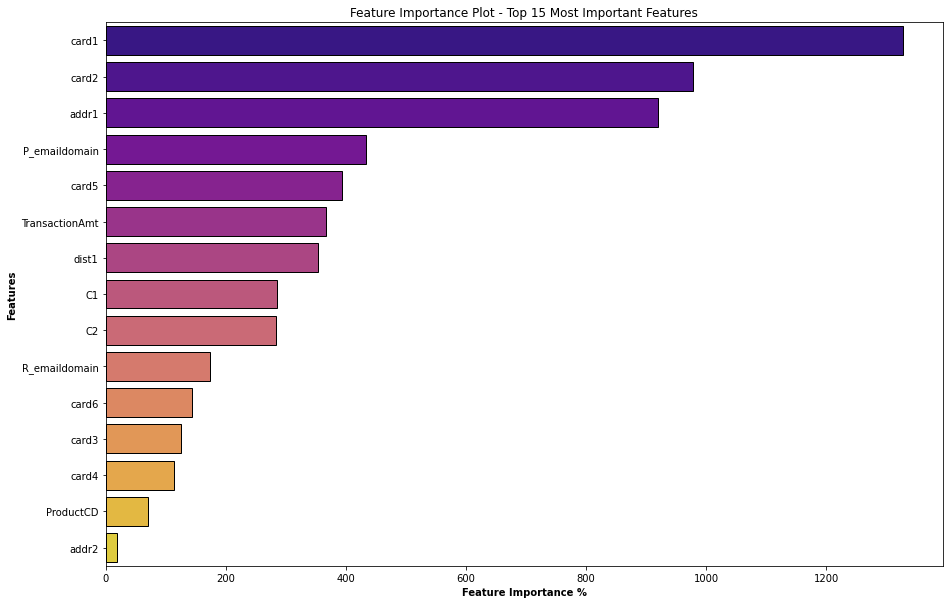

In [ ]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('Feature Importance Plot - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- card1 is contributing the most in predicting if a financial transaction is fraud or legitimate
- card2, addr1, P_emaildomain, etc are some of the most important features in predicting the fraud
- Certain card types, addresses and emails are at high risk of fraud, so there is a need to monitor these carefully

# SHAPASH

## SHAPASH Installation

In [24]:
!pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.4/18.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.8 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013919 sha256=0549972b02035b486fd1855e324042b8cd5d4964fb709f9ff845eff2dbfeaca9
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669692 sha

## Model Fitting

In [26]:
%%time
# Define the model
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(random_state=42, max_depth=20, n_estimators=100, num_leaves=256)

# Train the model
lgbc.fit(X_train,y_train)

lgbc

[LightGBM] [Info] Number of positive: 4386, number of negative: 119627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.398084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19282
[LightGBM] [Info] Number of data points in the train set: 124013, number of used features: 501
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035367 -> initscore=-3.305961
[LightGBM] [Info] Start training from score -3.305961
CPU times: user 24.4 s, sys: 1.39 s, total: 25.8 s
Wall time: 30.7 s


LGBMClassifier(max_depth=20, num_leaves=256, random_state=42)

## Encoding Categorical Features

In [27]:
y_pred = pd.DataFrame(lgbc.predict(X_test),columns=['pred'],index = X_test.index)
y_pred.head()

,pred
452550,False
495928,False
380991,False
326494,False
297733,False


In [28]:
y_pred['pred'] = y_pred['pred'].replace({True: 1, False: 0})

## Declare and Compile SmartExplainer

In [29]:
from shapash.explainer.smart_explainer import SmartExplainer

In [30]:
xpl = SmartExplainer(lgbc)

In [31]:
%%time
xpl.compile(x=X_test,y_pred=y_pred)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7acb3fc0af80>
CPU times: user 32min 56s, sys: 5.83 s, total: 33min 1s
Wall time: 20min 24s


## SHAPASH -  Features Importance Plot

- The methode features_importance displays a bar chart representing the sum of absolute contribution values of each feature.

- This method also makes it possible to represent this sum calculated on a subset and to compare it with the total population

In [32]:
xpl.plot.features_importance()

## SHAPASH -  Contibution Plot

Contribution Plot  displays violin or scatter plot. The purpose of these representations is to understand how a feature affects a prediction.

### Feature - C5

In [33]:
xpl.plot.contribution_plot('C5')

### Feature - C13

In [34]:
xpl.plot.contribution_plot('C13')

### Feature - Card1

In [38]:
xpl.plot.contribution_plot('card1')

### Feature - Card2

In [42]:
xpl.plot.contribution_plot('card2')

### Feature - Card4

In [43]:
xpl.plot.contribution_plot('card4')

### Feature - Card5

In [45]:
xpl.plot.contribution_plot('card5')

### Feature - Card6

In [46]:
xpl.plot.contribution_plot('card6')

### Feature - TransactionAmt

In [47]:
xpl.plot.contribution_plot('TransactionAmt')

### Feature - P_emaildomain

In [48]:
xpl.plot.contribution_plot('P_emaildomain')

### Feature - addr1

In [51]:
xpl.plot.contribution_plot('addr1')

## SHAPASH - Local Plot

Use row_num, index or query parameter to specify which row prediction you want to explain

In [52]:
#Local Plot for row/observation 27
xpl.plot.local_plot(row_num = 27)

**Inferences:**

1. Plot shows the proba score as 0.02 for row 27 and Id: 3942 which indicates the probability of transaction being fraud is 2%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

In [53]:
#Local Plot for row/observation 48
xpl.plot.local_plot(row_num = 48)

**Inferences:**

1. Plot shows the proba score as 0.0018 for row 48 and Id: 578709 which indicates the probability of transaction being fraud is 0.1%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

In [54]:
#Local Plot for row/observation 64
xpl.plot.local_plot(row_num = 64)

**Inferences:**

1. Plot shows the proba score as 0.7439 for row 64 and Id: 194418 which indicates the probability of transaction being fraud is 74.39%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

In [55]:
#Local Plot for row/observation 79
xpl.plot.local_plot(row_num = 79)

**Inferences:**

1. Plot shows the proba score as 0.0205 for row 79 and Id: 133438 which indicates the probability of transaction being fraud is 2%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

## Start SHAPASH WebApp

In [59]:
%%time
app = xpl.run_app(title_story='Financial Transaction Fraud Detection')

CPU times: user 1min 30s, sys: 968 ms, total: 1min 31s
Wall time: 1min 33s


## Save Explainer in Pickle File

In [60]:
#save the SmartExplainer Object in a pickle file to make new plots later or launch the WebApp again
predictor = xpl.to_smartpredictor()
predictor.save('./predictor.pkl')

## Stop SHAPASH WebApp

In [58]:
app.kill()